In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.combine import *
from imblearn.combine import *
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from bayes_opt import BayesianOptimization
from lightgbm import LGBMRegressor
from sklearn.preprocessing import Binarizer
from sklearn.impute import SimpleImputer
from xgboost import plot_importance
from sklearn.decomposition import PCA

In [2]:
human_train = pd.read_csv("work/human.csv", encoding="cp949")

# 성별 수치형으로 변환

In [3]:
human_train[["성별"]] = human_train[["성별"]].apply(lambda x: x.str.lstrip())
human_train[["성별"]] = human_train[["성별"]].apply(lambda x: x.astype('category').cat.codes)

In [4]:
human_train["성별"].value_counts()

1    21790
0    10771
Name: 성별, dtype: int64

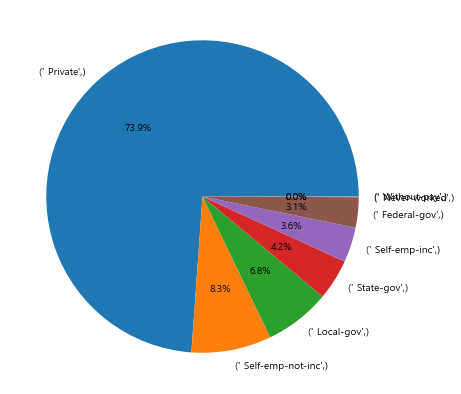

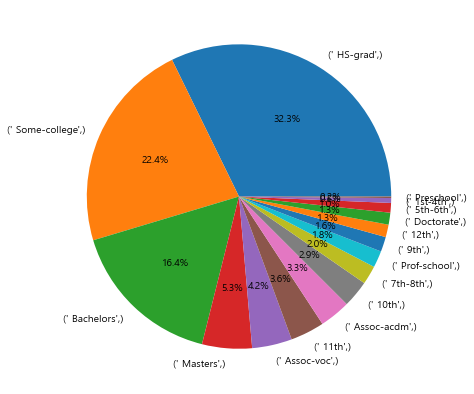

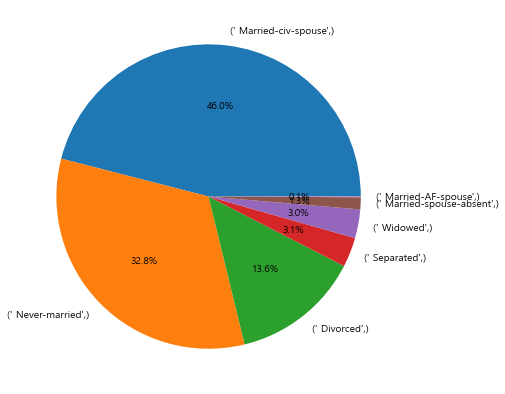

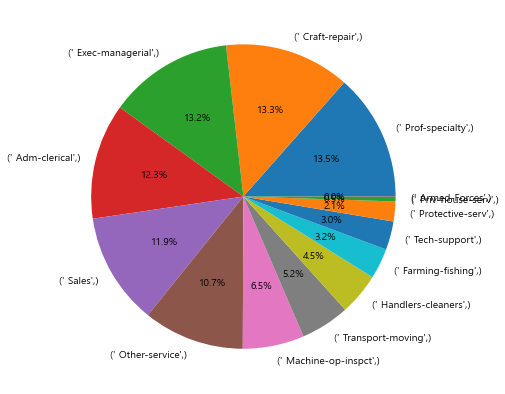

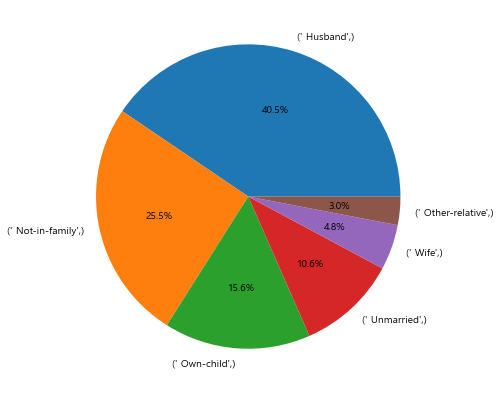

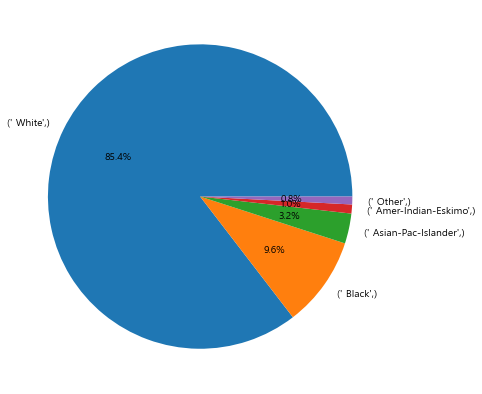

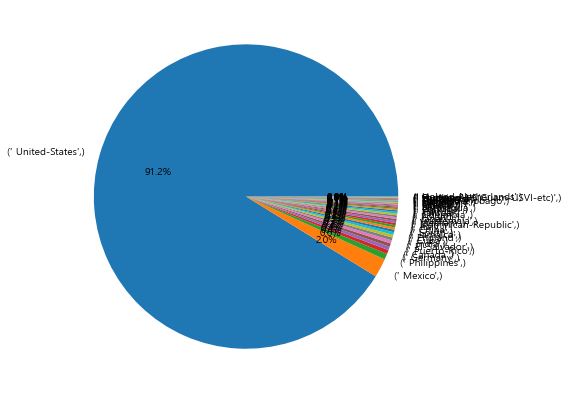

In [5]:
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['figure.figsize'] = [7, 7]
plt.axis('equal')
h=human_train[["노동 계급"]].value_counts()
plt.pie(h, labels = h.index, autopct = '%.1f%%')   
plt.show()
h=human_train[["학력"]].value_counts()
plt.pie(h, labels = h.index, autopct = '%.1f%%')   
plt.show()
h=human_train[["혼인 상태"]].value_counts()
plt.pie(h, labels = h.index, autopct = '%.1f%%')   
plt.show()
h=human_train[["직업"]].value_counts()
plt.pie(h, labels = h.index, autopct = '%.1f%%')   
plt.show()
h=human_train[["관계"]].value_counts()
plt.pie(h, labels = h.index, autopct = '%.1f%%')   
plt.show()
h=human_train[["인종"]].value_counts()
plt.pie(h, labels = h.index, autopct = '%.1f%%')   
plt.show()
h=human_train[["모국"]].value_counts()
plt.pie(h, labels = h.index, autopct = '%.1f%%')   
plt.show()

array([[<AxesSubplot:title={'center':'나이'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'교육 수'}>,
        <AxesSubplot:title={'center':'주당 시간'}>],
       [<AxesSubplot:title={'center':'자본 이득'}>,
        <AxesSubplot:title={'center':'자본 손실'}>]], dtype=object)

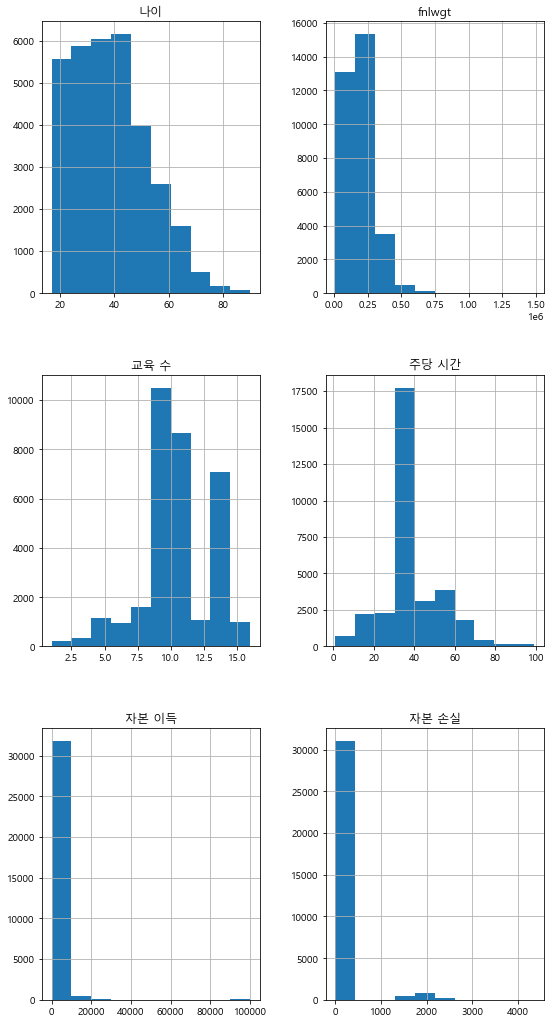

In [6]:
human_train.loc[:,['나이','fnlwgt','교육 수','주당 시간','자본 이득','자본 손실']].hist(bins=10,figsize=(9,18))

# 수치형변환 및 파생 변수 만들기

In [7]:
s1=human_train['자본 이득']
s2=human_train['자본 손실']
s=s1+s2
s.rename("순이익",inplace=True)
human_train = pd.concat([human_train,s],axis=1)

In [8]:
human_train['나이대'] = (human_train['나이']/10).astype(int)
human_train['주당 시간별'] = (human_train['주당 시간']/10).astype(int)
human_train['fnlwgt2'] = (human_train['fnlwgt']/10000).astype(int)

In [9]:
working_class = pd.get_dummies(human_train["노동 계급"])
human_train = pd.concat([human_train, working_class], axis=1)

human_train[["노동 계급"]] = human_train[["노동 계급"]].apply(lambda x: x.str.lstrip())
human_train[["노동 계급"]] = human_train[["노동 계급"]].apply(lambda x: x.astype('category').cat.codes)

In [10]:
academic_ability = pd.get_dummies(human_train["학력"])
human_train = pd.concat([human_train,academic_ability],axis=1)

human_train[["학력"]] = human_train[["학력"]].apply(lambda x: x.str.lstrip())
human_train[["학력"]] = human_train[["학력"]].apply(lambda x: x.astype('category').cat.codes)

In [11]:
marital_status = pd.get_dummies(human_train["혼인 상태"])
human_train = pd.concat([human_train,marital_status], axis=1)

human_train[["혼인 상태"]] = human_train[["혼인 상태"]].apply(lambda x: x.str.lstrip())
human_train[["혼인 상태"]] = human_train[["혼인 상태"]].apply(lambda x: x.astype('category').cat.codes)

In [12]:
jobs = pd.get_dummies(human_train["직업"])
human_train = pd.concat([human_train, jobs], axis=1)

human_train[["직업"]] = human_train[["직업"]].apply(lambda x: x.str.lstrip())
human_train[["직업"]] = human_train[["직업"]].apply(lambda x: x.astype('category').cat.codes)

In [13]:
relationship = pd.get_dummies(human_train["관계"])
human_train = pd.concat([human_train, relationship], axis=1)

human_train[["관계"]] = human_train[["관계"]].apply(lambda x: x.str.lstrip())
human_train[["관계"]] = human_train[["관계"]].apply(lambda x: x.astype('category').cat.codes)

In [14]:
race = pd.get_dummies(human_train["인종"])
human_train = pd.concat([human_train, race], axis=1)

human_train[["인종"]] = human_train[["인종"]].apply(lambda x: x.str.lstrip())
human_train[["인종"]] = human_train[["인종"]].apply(lambda x: x.astype('category').cat.codes)

In [15]:
homeland = pd.get_dummies(human_train["모국"])
human_train = pd.concat([human_train, homeland], axis=1)

human_train[["모국"]] = human_train[["모국"]].apply(lambda x: x.str.lstrip())
human_train[["모국"]] = human_train[["모국"]].apply(lambda x: x.astype('category').cat.codes)

In [16]:
human_train.drop([" Holand-Netherlands"],axis=1,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x170d303f1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x170d303f880>,
 'boxes': [<matplotlib.lines.Line2D at 0x170d3017e20>,
 'medians': [<matplotlib.lines.Line2D at 0x170d303ff40>,
 'fliers': [<matplotlib.lines.Line2D at 0x170d30492e0>,
 'means': []}

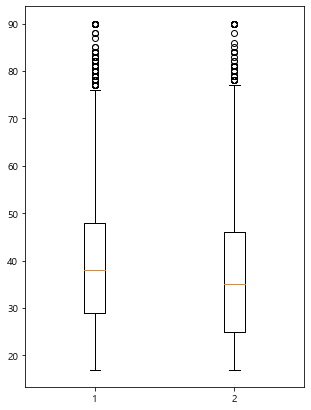

In [17]:
plt.rc('font', family='Malgun Gothic')
gender_male = human_train[human_train['성별']==1]
gender_female = human_train[human_train['성별']==0]
gender = [gender_male['나이'], gender_female['나이']]
plt.figure(figsize=(5,7))
plt.boxplot(gender)

# 아웃라이어 제거

In [25]:
def remove_outlier_test(d_cp, column):
    fraud_column_data = d_cp[column]
    quan_25 = np.percentile(fraud_column_data.values, 25)
    quan_75 = np.percentile(fraud_column_data.values, 75)
    iqr = quan_75 - quan_25
    lowest = quan_25 - iqr
    highest = quan_75 + iqr
    outlier_index = fraud_column_data[(fraud_column_data < lowest)|(fraud_column_data > highest)].index
    print(len(outlier_index))
    d_cp.drop(outlier_index, axis=0, inplace=True)
    print(d_cp.shape)
    
    return d_cp

In [26]:
remove_outlier_test(human_train, '나이') #0.93325
remove_outlier_test(human_train, '교육 수')
#remove_outlier_test(human_train, 'fnlwgt') #0.93404
#remove_outlier_test(human_train, '주당 시간') #0.93466 
#아래 두개 빼고 하면 0.93358
#remove_outlier_test(human_train, '자본 이득')
#remove_outlier_test(human_train, '자본 손실')
#다했을때 0.93281
#나이,교육 수만 했을때 0.93510
#remove_outlier_test(human_train, '학력') #나이 교육수 학력 0.93474

737
(31824, 119)
1987
(29837, 119)


,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,...,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,x,y,i,j
0,H20001,39,6,77516,9,13,4,0,1,4,...,0,0,0,1,0,0,-0.881865,-0.862522,0.910798,-0.762887
1,H20002,50,5,83311,9,13,2,3,0,4,...,0,0,0,1,0,0,-0.131818,-3.225326,-1.112089,-0.781282
2,H20003,38,3,215646,11,9,0,5,1,4,...,0,0,0,1,0,0,0.376244,0.227775,0.642892,0.805224
3,H20004,53,3,234721,1,7,2,5,0,2,...,0,0,0,1,0,0,-0.513642,0.208106,-0.739731,0.152396
4,H20005,28,3,338409,9,13,2,9,5,2,...,0,0,0,0,0,0,1.681610,1.556025,-0.292987,-0.364871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,H52557,27,3,257302,7,12,2,12,5,4,...,0,0,0,1,0,0,1.543817,0.302937,-0.358669,-0.015058
32557,H52558,40,3,154374,11,9,2,6,0,4,...,0,0,0,1,0,0,-0.449561,-0.357516,-0.906054,0.847162
32558,H52559,58,3,151910,11,9,6,0,4,4,...,0,0,0,1,0,0,-1.377276,-0.458970,0.394062,0.885520
32559,H52560,22,3,201490,11,9,4,0,3,4,...,0,0,0,1,0,0,2.338174,-1.437626,0.905397,0.716377


{'whiskers': [<matplotlib.lines.Line2D at 0x27e8ed227c0>,
 'caps': [<matplotlib.lines.Line2D at 0x27e8ed22e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x27e8ed22460>,
 'medians': [<matplotlib.lines.Line2D at 0x27e8ed2a580>,
 'fliers': [<matplotlib.lines.Line2D at 0x27e8ed2a8e0>,
 'means': []}

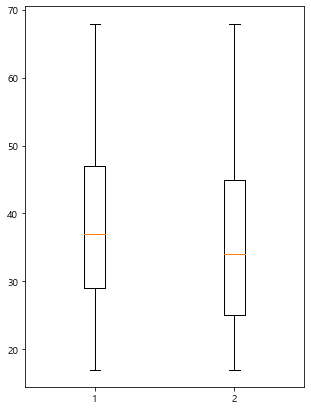

In [20]:
gender_male = human_train[human_train['성별']==1]
gender_female = human_train[human_train['성별']==0]
gender = [gender_male['나이'], gender_female['나이']]
plt.figure(figsize=(5,7))
plt.boxplot(gender)

# Standardization

In [18]:
human_train_x=human_train.loc[:,['주당 시간','주당 시간별','나이','나이대','fnlwgt','fnlwgt2','교육 수']]

In [19]:
scaler = StandardScaler()
scaler.fit(human_train_x)
x = scaler.transform(human_train_x)
human_train_x = pd.DataFrame(x, columns=human_train_x.columns)

In [20]:
# human_train.drop(['주당 시간','주당 시간별','나이','나이대','fnlwgt','fnlwgt2','교육 수'],axis=1,inplace=True)
# human_train = pd.concat([human_train,human_train_x],axis=1)

In [21]:
human_train_pca = human_train.loc[:,' Federal-gov':' Yugoslavia']

# 차원축소 PCA

In [22]:
pca = PCA(n_components=2)
result1 = pca.fit_transform(human_train_x)
result2 = pca.fit_transform(human_train_pca)
result1 = pd.DataFrame(result1, columns=["x", "y"])
result2 = pd.DataFrame(result2, columns=["i", "j"])

In [23]:
human_train = pd.concat([human_train,result1],axis=1)
human_train = pd.concat([human_train,result2],axis=1)

In [24]:
human_train

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,...,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,x,y,i,j
0,H20001,39,6,77516,9,13,4,0,1,4,...,0,0,0,1,0,0,-0.881865,-0.862522,0.910798,-0.762887
1,H20002,50,5,83311,9,13,2,3,0,4,...,0,0,0,1,0,0,-0.131818,-3.225326,-1.112089,-0.781282
2,H20003,38,3,215646,11,9,0,5,1,4,...,0,0,0,1,0,0,0.376244,0.227775,0.642892,0.805224
3,H20004,53,3,234721,1,7,2,5,0,2,...,0,0,0,1,0,0,-0.513642,0.208106,-0.739731,0.152396
4,H20005,28,3,338409,9,13,2,9,5,2,...,0,0,0,0,0,0,1.681610,1.556025,-0.292987,-0.364871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,H52557,27,3,257302,7,12,2,12,5,4,...,0,0,0,1,0,0,1.543817,0.302937,-0.358669,-0.015058
32557,H52558,40,3,154374,11,9,2,6,0,4,...,0,0,0,1,0,0,-0.449561,-0.357516,-0.906054,0.847162
32558,H52559,58,3,151910,11,9,6,0,4,4,...,0,0,0,1,0,0,-1.377276,-0.458970,0.394062,0.885520
32559,H52560,22,3,201490,11,9,4,0,3,4,...,0,0,0,1,0,0,2.338174,-1.437626,0.905397,0.716377


# 데이터 나누기

In [27]:
htX = human_train.drop(["아이디","성별"], axis=1)
htY = human_train["성별"]

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(htX, htY, test_size=0.25, random_state=0)

In [29]:
aX = np.array(htX)
aY = np.array(htY)
print(np.sum(aY == 1), np.sum(aY == 0))

19804 10033


# xgboost

In [30]:
dtrain = xgb.DMatrix(data=htX, label=htY)
dtest = xgb.DMatrix(data=X_test, label=Y_test)

In [31]:
params = {'max_depth':3, #노드 깊이
          'eta':0.1, #훈련량 낮을수록 미세함
          'objective':'binary:logistic', #이항 분류
          'eval_metric':'logloss', #negative log-likelihood
         }
num_rounds = 400 #부스팅 반복량
# booster = gbtree 트리 모델 

In [32]:
wlist = [(dtrain, 'train'),(dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)
#wlist와 비교함

[0]	train-logloss:0.64495	eval-logloss:0.64540
[1]	train-logloss:0.60534	eval-logloss:0.60576
[2]	train-logloss:0.57218	eval-logloss:0.57294
[3]	train-logloss:0.54414	eval-logloss:0.54485
[4]	train-logloss:0.52011	eval-logloss:0.52113
[5]	train-logloss:0.49943	eval-logloss:0.50043
[6]	train-logloss:0.48147	eval-logloss:0.48273
[7]	train-logloss:0.46582	eval-logloss:0.46723
[8]	train-logloss:0.45200	eval-logloss:0.45367
[9]	train-logloss:0.43978	eval-logloss:0.44127
[10]	train-logloss:0.42872	eval-logloss:0.43044
[11]	train-logloss:0.41868	eval-logloss:0.42058
[12]	train-logloss:0.40957	eval-logloss:0.41168
[13]	train-logloss:0.40158	eval-logloss:0.40369
[14]	train-logloss:0.39430	eval-logloss:0.39659
[15]	train-logloss:0.38782	eval-logloss:0.39037
[16]	train-logloss:0.38178	eval-logloss:0.38450
[17]	train-logloss:0.37640	eval-logloss:0.37900
[18]	train-logloss:0.37149	eval-logloss:0.37423
[19]	train-logloss:0.36678	eval-logloss:0.36951
[20]	train-logloss:0.36274	eval-logloss:0.36544
[2

[170]	train-logloss:0.28699	eval-logloss:0.29103
[171]	train-logloss:0.28689	eval-logloss:0.29094
[172]	train-logloss:0.28680	eval-logloss:0.29090
[173]	train-logloss:0.28676	eval-logloss:0.29085
[174]	train-logloss:0.28660	eval-logloss:0.29068
[175]	train-logloss:0.28649	eval-logloss:0.29058
[176]	train-logloss:0.28639	eval-logloss:0.29043
[177]	train-logloss:0.28621	eval-logloss:0.29024
[178]	train-logloss:0.28616	eval-logloss:0.29020
[179]	train-logloss:0.28606	eval-logloss:0.29011
[180]	train-logloss:0.28599	eval-logloss:0.29005
[181]	train-logloss:0.28596	eval-logloss:0.29002
[182]	train-logloss:0.28587	eval-logloss:0.28996
[183]	train-logloss:0.28581	eval-logloss:0.28991
[184]	train-logloss:0.28571	eval-logloss:0.28975
[185]	train-logloss:0.28564	eval-logloss:0.28966
[186]	train-logloss:0.28558	eval-logloss:0.28962
[187]	train-logloss:0.28552	eval-logloss:0.28955
[188]	train-logloss:0.28546	eval-logloss:0.28951
[189]	train-logloss:0.28542	eval-logloss:0.28949
[190]	train-logloss:

[338]	train-logloss:0.27547	eval-logloss:0.27936
[339]	train-logloss:0.27543	eval-logloss:0.27935
[340]	train-logloss:0.27539	eval-logloss:0.27930
[341]	train-logloss:0.27536	eval-logloss:0.27929
[342]	train-logloss:0.27533	eval-logloss:0.27923
[343]	train-logloss:0.27525	eval-logloss:0.27914
[344]	train-logloss:0.27516	eval-logloss:0.27907
[345]	train-logloss:0.27510	eval-logloss:0.27902
[346]	train-logloss:0.27500	eval-logloss:0.27897
[347]	train-logloss:0.27491	eval-logloss:0.27888
[348]	train-logloss:0.27487	eval-logloss:0.27884
[349]	train-logloss:0.27486	eval-logloss:0.27882
[350]	train-logloss:0.27482	eval-logloss:0.27877
[351]	train-logloss:0.27479	eval-logloss:0.27874
[352]	train-logloss:0.27476	eval-logloss:0.27871
[353]	train-logloss:0.27474	eval-logloss:0.27866
[354]	train-logloss:0.27471	eval-logloss:0.27865
[355]	train-logloss:0.27468	eval-logloss:0.27862
[356]	train-logloss:0.27459	eval-logloss:0.27852
[357]	train-logloss:0.27446	eval-logloss:0.27842
[358]	train-logloss:

In [33]:
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

[1.    0.086 0.482 0.067 0.907 1.    1.    1.    0.65  1.   ]


In [34]:
def get_clf_eval(Y_test, pred):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [35]:
get_clf_eval(Y_test, preds)

오차행렬
[[2114  416]
 [ 587 4343]]
정확도: 0.8655, 정밀도: 0.9126, 재현율: 0.8809


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

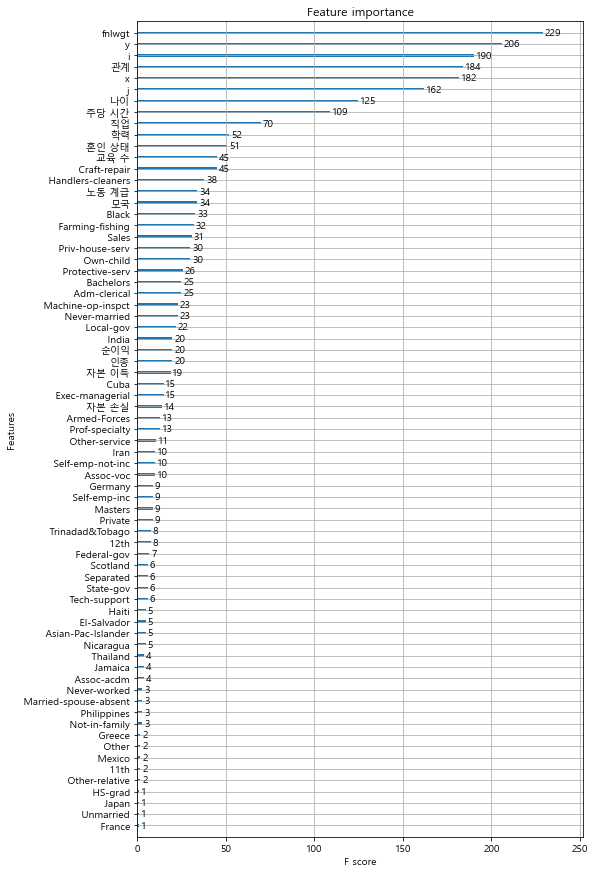

In [36]:
plt.rc('font', family='Malgun Gothic')
flg, ax = plt.subplots(figsize=(8, 15))
plot_importance(xgb_model, ax=ax)

# PR curve

In [37]:
def plot_precision_recall_curve(precisions, recalls) :
    plt.plot(recalls, precisions, color='blue')
    plt.axis([0,1,0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR curve')

In [38]:
X_test_ndf= xgb.DMatrix(data=X_test)

In [39]:
precisions, recalls, _ = precision_recall_curve(Y_test, 
                                    xgb_model.predict(X_test_ndf))

In [40]:
precisions

array([0.704487  , 0.70444476, 0.70454545, ..., 1.        , 1.        ,
       1.        ])

In [41]:
recalls

array([1.00000000e+00, 9.99797160e-01, 9.99797160e-01, ...,
       4.05679513e-04, 2.02839757e-04, 0.00000000e+00])

In [42]:
_

array([0.04508631, 0.04521737, 0.04645699, ..., 0.99998844, 0.99999225,
       0.9999944 ], dtype=float32)

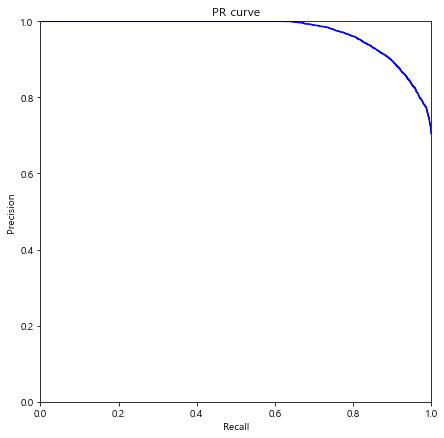

In [43]:
plot_precision_recall_curve(precisions, recalls)

In [44]:
fpr, tpr, _ = roc_curve(Y_test, xgb_model.predict(X_test_ndf))
auc(fpr, tpr)

0.9445312236929664

In [45]:
print(Y_test.value_counts())
dummy=DummyClassifier(strategy='most_frequent').fit(aX, aY)
dummy.score(X_test, Y_test)

1    4930
0    2530
Name: 성별, dtype: int64


0.660857908847185

In [46]:
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

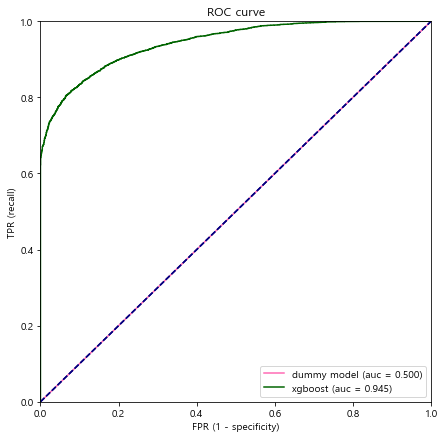

In [47]:
fpr_dummy, tpr_dummy, _ = roc_curve(Y_test, 
                                    dummy.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_dummy, tpr_dummy, 'dummy model', 'hotpink')
fpr_tree, tpr_tree, _ = roc_curve(Y_test, 
                                  xgb_model.predict(X_test_ndf))
plot_roc_curve(fpr_tree, tpr_tree, 'xgboost', 'darkgreen')

In [48]:
human_new = pd.read_csv("work/human_new.csv", encoding="cp949")

In [49]:
s1=human_new['자본 이득']
s2=human_new['자본 손실']
s=s1+s2
s.rename("순이익",inplace=True)
human_new = pd.concat([human_new,s],axis=1)

In [50]:
human_new['나이대'] = (human_new['나이']/10).astype(int)
human_new['주당 시간별'] = (human_new['주당 시간']/10).astype(int)
human_new['fnlwgt2'] = (human_new['fnlwgt']/10000).astype(int)

In [51]:
working_class = pd.get_dummies(human_new["노동 계급"])
human_new = pd.concat([human_new, working_class], axis=1)

human_new[["노동 계급"]] = human_new[["노동 계급"]].apply(lambda x: x.str.lstrip())
human_new[["노동 계급"]] = human_new[["노동 계급"]].apply(lambda x: x.astype('category').cat.codes)

In [52]:
academic_ability = pd.get_dummies(human_new["학력"])
human_new = pd.concat([human_new,academic_ability],axis=1)

human_new[["학력"]] = human_new[["학력"]].apply(lambda x: x.str.lstrip())
human_new[["학력"]] = human_new[["학력"]].apply(lambda x: x.astype('category').cat.codes)

In [53]:
marital_status = pd.get_dummies(human_new["혼인 상태"])
human_new = pd.concat([human_new,marital_status], axis=1)

human_new[["혼인 상태"]] = human_new[["혼인 상태"]].apply(lambda x: x.str.lstrip())
human_new[["혼인 상태"]] = human_new[["혼인 상태"]].apply(lambda x: x.astype('category').cat.codes)

In [54]:
jobs = pd.get_dummies(human_new["직업"])
human_new = pd.concat([human_new, jobs], axis=1)

human_new[["직업"]] = human_new[["직업"]].apply(lambda x: x.str.lstrip())
human_new[["직업"]] = human_new[["직업"]].apply(lambda x: x.astype('category').cat.codes)

In [55]:
relationship = pd.get_dummies(human_new["관계"])
human_new = pd.concat([human_new, relationship], axis=1)

human_new[["관계"]] = human_new[["관계"]].apply(lambda x: x.str.lstrip())
human_new[["관계"]] = human_new[["관계"]].apply(lambda x: x.astype('category').cat.codes)

In [56]:
race = pd.get_dummies(human_new["인종"])
human_new = pd.concat([human_new, race], axis=1)

human_new[["인종"]] = human_new[["인종"]].apply(lambda x: x.str.lstrip())
human_new[["인종"]] = human_new[["인종"]].apply(lambda x: x.astype('category').cat.codes)

In [57]:
homeland = pd.get_dummies(human_new["모국"])
human_new = pd.concat([human_new, homeland], axis=1)

human_new[["모국"]] = human_new[["모국"]].apply(lambda x: x.str.lstrip())
human_new[["모국"]] = human_new[["모국"]].apply(lambda x: x.astype('category').cat.codes)

In [58]:
human_new_x=human_new.loc[:,['주당 시간','주당 시간별','나이','나이대','fnlwgt','fnlwgt2','교육 수']]
scaler = StandardScaler()
scaler.fit(human_new_x)
x = scaler.transform(human_new_x)
human_new_x = pd.DataFrame(x, columns=human_new_x.columns)
# human_new.drop(['주당 시간','주당 시간별','나이','나이대','fnlwgt','fnlwgt2','교육 수'],axis=1,inplace=True)
# human_new = pd.concat([human_new,human_new_x],axis=1)

In [59]:
human_new_pca = human_new.loc[:,' Federal-gov':' Yugoslavia']
pca = PCA(n_components=2)
result1 = pca.fit_transform(human_new_x)
result2 = pca.fit_transform(human_new_pca)
result1 = pd.DataFrame(result1, columns=["x", "y"])
result2 = pd.DataFrame(result2, columns=["i", "j"])

human_new = pd.concat([human_new,result1],axis=1)
human_new = pd.concat([human_new,result2],axis=1)

In [60]:
human_new_ndf= xgb.DMatrix(data=human_new.iloc[:, 1:])

In [61]:
ndf_predict = xgb_model.predict(human_new_ndf)

In [62]:
human_new['성별'] = ndf_predict
ndf_rename=human_new[['아이디','성별']]
ndf_rename = ndf_rename.rename(columns={'아이디':'ID', '성별':'SEX'})
ndf_rename.head()

,ID,SEX
0,H00001,0.639296
1,H00002,0.999946
2,H00003,0.999919
3,H00004,0.999888
4,H00005,0.422001


In [63]:
ndf_rename.to_csv('submission_human.csv', encoding='cp949', index=False)

In [64]:
ndf_rename.shape

(16281, 2)